In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import hvplot.pandas


In [10]:
wage_data = pd.read_csv(r"C:\Users\natar\Downloads\Minimum Wage Data.csv",encoding="latin1")
state_data = pd.read_csv(r"C:\Users\natar\Downloads\state_coords.csv",encoding="latin1")
merged_df = pd.merge(wage_data, state_data, left_on="State", right_on="State", how="inner")
merged_df = merged_df.drop(columns="Footnote")
merged_df = merged_df.drop(columns= "Department.Of.Labor.Uncleaned.Data")
df=pd.DataFrame(merged_df)
df.head()



,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,ï»¿Abbv,latitude,longitude
0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,0.0,0.0,0.0,0.0,AL,32.318231,-86.902298
1,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,0.0,0.0,0.0,0.0,AL,32.318231,-86.902298
2,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,0.0,0.0,0.0,0.0,AL,32.318231,-86.902298
3,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,0.0,0.0,0.0,0.0,AL,32.318231,-86.902298
4,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,0.0,0.0,0.0,0.0,AL,32.318231,-86.902298


In [11]:
df.tail()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,ï»¿Abbv,latitude,longitude
2751,2016,Wyoming,5.15,5.55,7.25,7.81,7.25,7.81,240.007,5.15,5.55,5.15,5.55,WY,43.075968,-107.290284
2752,2017,Wyoming,5.15,5.43,7.25,7.65,7.25,7.65,245.120,5.15,5.43,5.15,5.43,WY,43.075968,-107.290284
2753,2018,Wyoming,5.15,5.30,7.25,7.47,7.25,7.47,251.107,5.15,5.30,5.15,5.30,WY,43.075968,-107.290284
2754,2019,Wyoming,5.15,5.21,7.25,7.34,7.25,7.34,255.657,5.15,5.21,5.15,5.21,WY,43.075968,-107.290284
2755,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.660,5.15,5.15,5.15,5.15,WY,43.075968,-107.290284


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


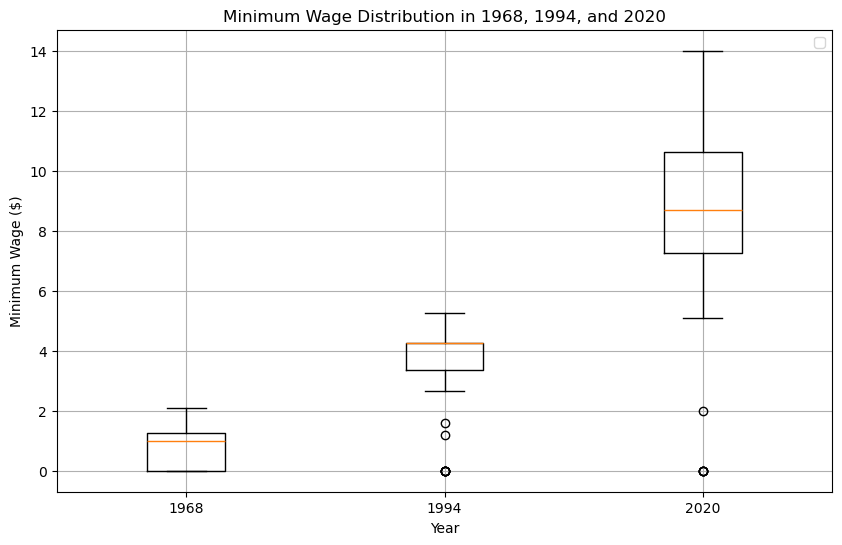

In [12]:
# Extract data for 1968, 1994, and 2020
minimum_wage_1968 = df[df['Year'] == 1968]['State.Minimum.Wage']
minimum_wage_1994 = df[df['Year'] == 1994]['State.Minimum.Wage']
minimum_wage_2020 = df[df['Year'] == 2020]['State.Minimum.Wage']

# Create box plots
plt.figure(figsize=(10, 6))

# Plot box plots for 1968, 1994, and 2020
plt.boxplot([minimum_wage_1968, minimum_wage_1994, minimum_wage_2020], positions=[1, 2, 3], labels=['1968', '1994', '2020'])

# Set x-axis limits
plt.xlim(0.5, 3.5)

plt.xlabel('Year')
plt.ylabel('Minimum Wage ($)')
plt.title('Minimum Wage Distribution in 1968, 1994, and 2020')
plt.grid(True)
plt.legend()
plt.show()

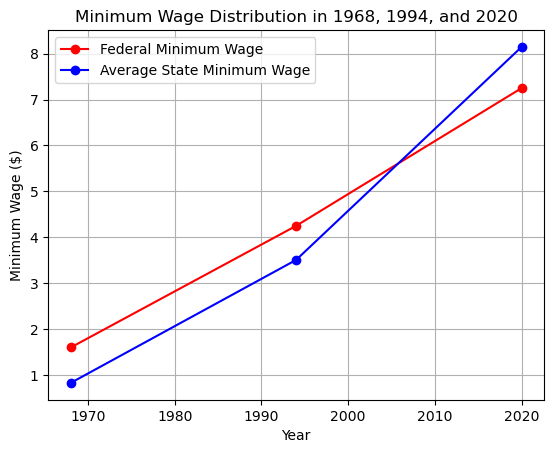

In [13]:
# Extract data for 1968, 1994, and 2020
minimum_wage_1968 = df[df['Year'] == 1968]['State.Minimum.Wage']
minimum_wage_1994 = df[df['Year'] == 1994]['State.Minimum.Wage']
minimum_wage_2020 = df[df['Year'] == 2020]['State.Minimum.Wage']

# Calculate average state minimum wage for 1968, 1994, and 2020
average_state_minimum_wage = [minimum_wage_1968.mean(), minimum_wage_1994.mean(), minimum_wage_2020.mean()]

# Federal minimum wage data
federal_minimum_wage_years = [1968, 1994, 2020]
federal_minimum_wages = [1.6, 4.25, 7.25]  # Example federal minimum wage values for the corresponding years

# Create line plot for federal minimum wage
plt.plot(federal_minimum_wage_years, federal_minimum_wages, marker='o', color='r', label='Federal Minimum Wage')

# Create line plot for average state minimum wage
plt.plot(federal_minimum_wage_years, average_state_minimum_wage, marker='o', color='b', label='Average State Minimum Wage')

plt.xlabel('Year')
plt.ylabel('Minimum Wage ($)')
plt.title('Minimum Wage Distribution in 1968, 1994, and 2020')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
stats.f_oneway(minimum_wage_1968, minimum_wage_1994, minimum_wage_2020)

F_onewayResult(statistic=138.8309318276223, pvalue=4.144371478681752e-35)

In [15]:
df_1994=df[df["Year"]==1994]
df_1994

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,ï»¿Abbv,latitude,longitude
26,1994,Alabama,0.00,0.00,4.25,7.42,4.25,7.42,148.2,0.00,0.00,0.00,0.00,AL,32.318231,-86.902298
79,1994,Alaska,4.75,8.29,4.25,7.42,4.75,8.29,148.2,4.75,8.29,4.75,8.29,AK,63.588753,-154.493062
132,1994,Arizona,0.00,0.00,4.25,7.42,4.25,7.42,148.2,0.00,0.00,0.00,0.00,AZ,34.048928,-111.093731
185,1994,Arkansas,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,7.42,4.25,7.42,AR,35.201050,-91.831833
238,1994,California,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,7.42,4.25,7.42,CA,36.778261,-119.417932
291,1994,Colorado,3.00,5.24,4.25,7.42,4.25,7.42,148.2,3.00,5.24,3.00,5.24,CO,39.550051,-105.782067
344,1994,Connecticut,4.27,7.45,4.25,7.42,4.27,7.45,148.2,4.27,7.45,4.27,7.45,CT,41.603221,-73.087749
397,1994,Delaware,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,7.42,4.25,7.42,DE,38.910832,-75.527670
450,1994,District of Columbia,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,7.42,4.25,7.42,DC,38.905985,-77.033418
503,1994,Florida,0.00,0.00,4.25,7.42,4.25,7.42,148.2,0.00,0.00,0.00,0.00,FL,27.664827,-81.515754


In [16]:
df_2020 = df[df['Year'] == 2020]
df_2020.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,ï»¿Abbv,latitude,longitude
52,2020,Alabama,0.00,0.00,7.25,7.25,7.25,7.25,258.66,0.00,0.00,0.00,0.00,AL,32.318231,-86.902298
105,2020,Alaska,10.19,10.19,7.25,7.25,10.19,10.19,258.66,10.19,10.19,10.19,10.19,AK,63.588753,-154.493062
158,2020,Arizona,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12.00,12.00,12.00,12.00,AZ,34.048928,-111.093731
211,2020,Arkansas,10.00,10.00,7.25,7.25,10.00,10.00,258.66,10.00,10.00,10.00,10.00,AR,35.201050,-91.831833
264,2020,California,13.00,13.00,7.25,7.25,13.00,13.00,258.66,13.00,13.00,13.00,13.00,CA,36.778261,-119.417932


In [17]:
df_2020['Difference_2020'] = df_2020['State.Minimum.Wage'] - df_2020['Federal.Minimum.Wage']

In [18]:
negative_diff_df = df_2020[df_2020['Difference_2020'] < 0]

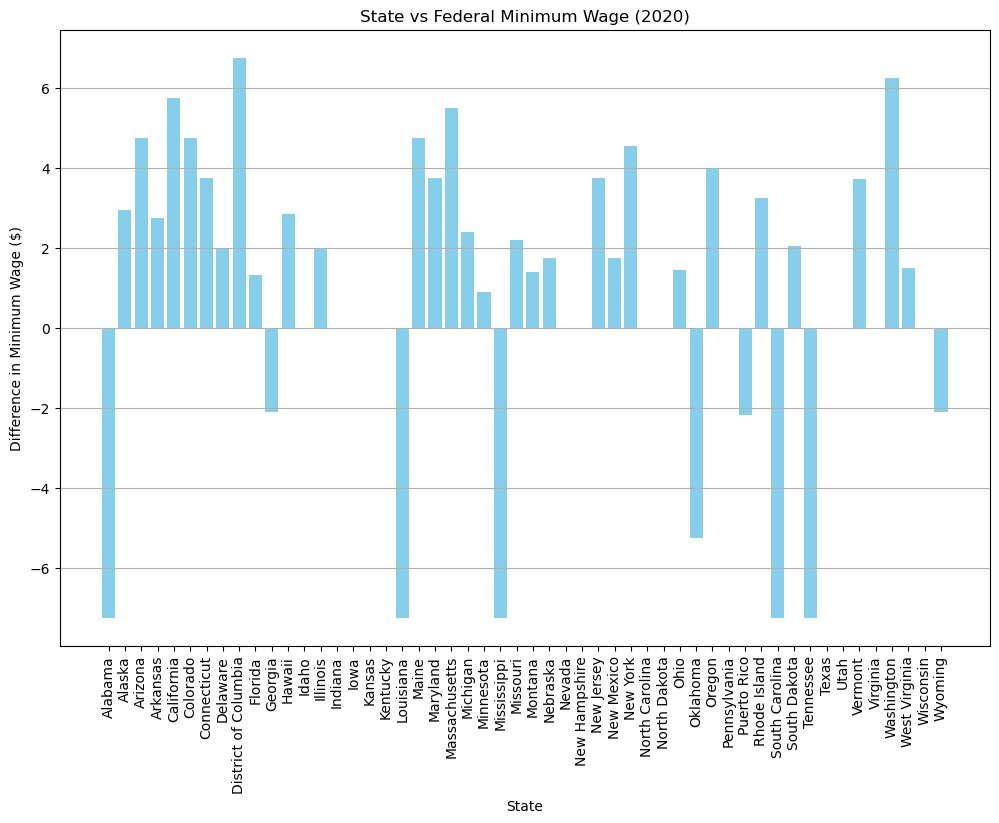

In [19]:
plt.figure(figsize=(12,8))
plt.bar(df_2020['State'], df_2020['Difference_2020'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Difference in Minimum Wage ($)')
plt.xticks(rotation = 90)
plt.title('State vs Federal Minimum Wage (2020)')
plt.grid(axis='y')
plt.show()


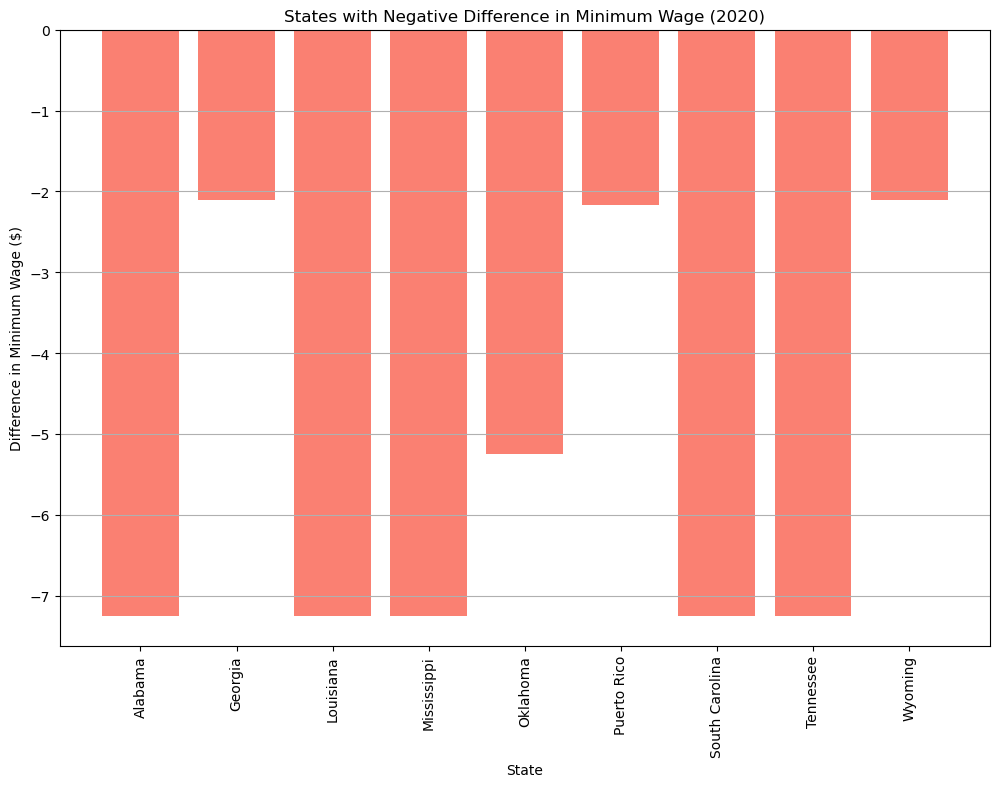

In [20]:
plt.figure(figsize=(12, 8))
plt.bar(negative_diff_df['State'], negative_diff_df['Difference_2020'], color='salmon')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Difference in Minimum Wage ($)')
plt.title('States with Negative Difference in Minimum Wage (2020)')
plt.grid(axis='y')
plt.show()

In [28]:
# Plotting a map to plot regionality and show differences in minimum wage per state
# 1994 vs 2020
# changing point color by difference in values
map_plot_1 = df_2020.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM"
)
map_plot_1


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]

In [31]:
map_plot_2 = df_1994.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "OSM",
    color = "red"
)
map_plot_2


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]